## Abstract

[Reinforcement learning](https://en.wikipedia.org/wiki/Reinforcement_learning) (RL) is the branch of machine learning that deals with learning from interacting with an environment where feedback may be delayed.
Although RL is a very powerful tool that has been successfully applied to problems ranging from the optimization of chemical reactions to teaching a computer to play video games, it has historically been difficult to get started with, due to the lack of availability of interesting and challenging environments on which to experiment.


This is where [OpenAI Gym](https://gym.openai.com/) comes in

OpenAI Gym is a Python package comprising a selection of RL [environments](https://gym.openai.com/envs/#classic_control), ranging from simple “toy” environments to more challenging environments, including simulated robotics environments and Atari video game environments.
It was developed with the aim of becoming a standardized environment and benchmark for RL research.
In this article, we will use the OpenAI Gym Mountain Car environment to demonstrate how to get started in using this exciting tool and show how Q-learning can be used to solve this problem.


#### Libraries Required :

In [4]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import gym
from IPython.display import Image

#### Imported environment MountainCar from Gym and stored in env

![title](images/mountain_car.png)

In [7]:
env = gym.make('MountainCar-v0')

### States, the Actions and the Size of the Q-table?

#### Size of action space

In [8]:
env.action_space.n

3

#### Limits of state space

In [9]:
env.observation_space.high

array([0.6 , 0.07], dtype=float32)

In [10]:
env.observation_space.low

array([-1.2 , -0.07], dtype=float32)

#### States 

Position = -1.2 to +0.6   
Velocity = -0.07 to +0.07

#### Actions 
PushLeft, PushRight, NoPush

#### Size of Q-table :

(0.6+1.2+0.1)*10 = 19   
(0.07+0.07+0.01) = 15   
action space = 3

Q table size = (19*15*3)


#### Resets the state of the environment and returns an initial observation

In [12]:
# Random position from -0.6 to -0.4 with no velocity is the starting state
print(env.reset()) ###

[-0.49088448  0.        ]


#### Run one timestep of the environment's dynamics

In [16]:
print(env.step(1)) # Return new state,reward,done,info

(array([-0.49330678, -0.00096165]), -1.0, False, {})


### Rewards

Rewards are -1 for each time step, until the goal position of 0.5 is reached.

#### Function defined for Q learning Code

In [229]:
def QLearning_old(env, learning, discount, epsilon, min_eps,episodes):
    # Converting observation space to integers multiplying with 10 and 100 for position and velocity respectively
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    
    # Initial Values for q table within range -1 to 1 randomly with q table of dim 19*15*3
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (num_states[0], num_states[1], 
                                  env.action_space.n))
    # List variables to store rewards list avg rewards and car positions
    reward_list = []
    ave_reward_list = []
    car_position = []
    
    # Calculating  episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    
    for i in range(episodes):
        done = False
        tot_reward, reward = 0,0
        #env is reseted for every new epsiode
        state = env.reset()

        #Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        
        while done != True:
            # render only last twenty episodes
            
#             if i >= (episodes - 20):
#                 env.render()

            # Determine next action - epsilon greedy strategy    
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
            
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
            else: # Adjust Q value for current state
                delta = learning*(reward + 
                                 discount*(np.max(Q[state2_adj[0], 
                                                   state2_adj[1]]) - 
                                 Q[state_adj[0], state_adj[1],action]))
                Q[state_adj[0], state_adj[1],action] += delta
            
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
            
            # Decay epsilon
            if epsilon > min_eps:
                epsilon -= reduction

            
              
            
        reward_list.append(tot_reward)
        
        car_position+=[state2[0]]
        
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        if (i+1) % 100 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
            
            
    env.close()
    
    return car_position
        
    

### Below is the baseline performance of the Mountain Car  using some standard values for alpha,gamma,epsilon and number of episodes

In [232]:
rewards = QLearning_old(env, 0.2, 0.9, 0.8, 0,5000)

Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -195.52
Episode 500 Average Reward: -191.97
Episode 600 Average Reward: -197.24
Episode 700 Average Reward: -184.14
Episode 800 Average Reward: -191.78
Episode 900 Average Reward: -191.98
Episode 1000 Average Reward: -194.89
Episode 1100 Average Reward: -181.37
Episode 1200 Average Reward: -170.34
Episode 1300 Average Reward: -177.18
Episode 1400 Average Reward: -170.69
Episode 1500 Average Reward: -186.11
Episode 1600 Average Reward: -185.49
Episode 1700 Average Reward: -170.88
Episode 1800 Average Reward: -157.17
Episode 1900 Average Reward: -181.46
Episode 2000 Average Reward: -164.75
Episode 2100 Average Reward: -160.86
Episode 2200 Average Reward: -158.1
Episode 2300 Average Reward: -171.53
Episode 2400 Average Reward: -171.43
Episode 2500 Average Reward: -163.6
Episode 2600 Average Reward: -169.0
Episode 2700 Average Reward: -173.28
Episode 2800 Ave

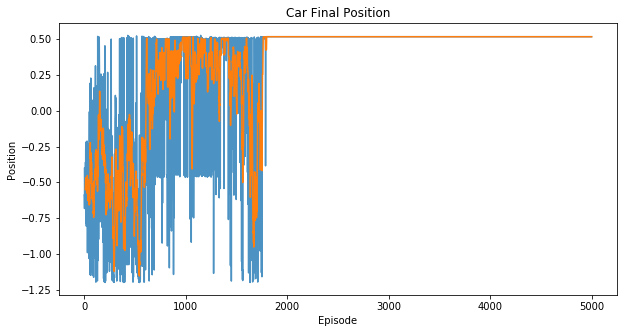

In [231]:
plt.figure(2, figsize=[10,5])
p = pd.Series(rewards)
ma = p.rolling(10).mean()
plt.plot(p, alpha=0.8)
plt.plot(ma)
plt.xlabel('Episode')
plt.ylabel('Position')
plt.title('Car Final Position')
plt.show()

##### While using baseline parameters the car is reaching the target consistently after 2000 episodes 

In [221]:
def QLearning_new_pf(env, learning, discount, epsilon, min_eps, decay_rate,episodes):
    # Converting observation space to integers multiplying with 10 and 100 for position and velocity respectively
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    
    # Initial Values for q table within range -1 to 1 randomly with q table of dim 19*15*3
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (num_states[0], num_states[1], 
                                  env.action_space.n))
    # List variables to store rewards list avg rewards and car positions
    reward_list = []
    ave_reward_list = []
    car_position = []
    
    # Calculating  episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    
    for i in range(episodes):
        done = False
        tot_reward, reward = 0,0
        #env is reseted for every new epsiode
        state = env.reset()

        #Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        
        while done != True:
            # render only last twenty episodes
            
#             if i >= (episodes - 20):
#                 env.render()

            # Determine next action - epsilon greedy strategy    
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
            
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            else: # Adjust Q value for current state
                delta = learning*(reward + 
                                 discount*(np.max(Q[state2_adj[0], 
                                                   state2_adj[1]]) - 
                                 Q[state_adj[0], state_adj[1],action]))
                Q[state_adj[0], state_adj[1],action] += delta
            
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
            
            # Decay epsilon
#             if epsilon > min_eps:
#                 epsilon -= reduction

            #As Exploration should be more in the beginning once reaches target exploration should be minimum
            epsilon = min_eps + (epsilon - min_eps)*np.exp(-decay_rate*i)   
            
        reward_list.append(tot_reward)
        
        car_position+=[state2[0]]
        
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        if (i+1) % 100 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
            
            
    env.close()
    
    return car_position
        
    

In [233]:
rewards_new_pf = QLearning_new_pf(env, 0.2, 0.9, 0.8, 0, 0.01,5000)

Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -199.49
Episode 400 Average Reward: -194.41
Episode 500 Average Reward: -193.58
Episode 600 Average Reward: -198.33
Episode 700 Average Reward: -188.98
Episode 800 Average Reward: -195.81
Episode 900 Average Reward: -197.22
Episode 1000 Average Reward: -182.89
Episode 1100 Average Reward: -178.31
Episode 1200 Average Reward: -181.56
Episode 1300 Average Reward: -166.29
Episode 1400 Average Reward: -154.78
Episode 1500 Average Reward: -148.27
Episode 1600 Average Reward: -154.03
Episode 1700 Average Reward: -158.72
Episode 1800 Average Reward: -152.64
Episode 1900 Average Reward: -145.52
Episode 2000 Average Reward: -157.73
Episode 2100 Average Reward: -152.42
Episode 2200 Average Reward: -149.81
Episode 2300 Average Reward: -170.56
Episode 2400 Average Reward: -149.12
Episode 2500 Average Reward: -146.6
Episode 2600 Average Reward: -146.4
Episode 2700 Average Reward: -144.52
Episode 2800 A

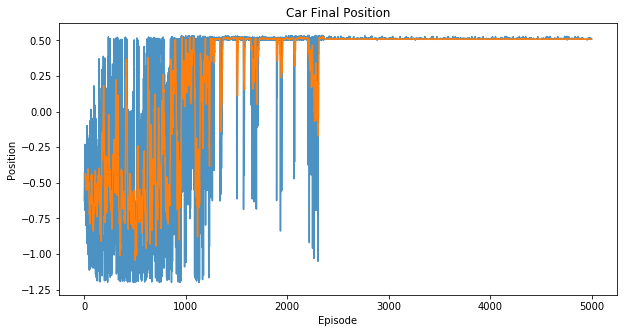

In [234]:
plt.figure(2, figsize=[10,5])
p = pd.Series(rewards_new_pf)
ma = p.rolling(10).mean()
plt.plot(p, alpha=0.8)
plt.plot(ma)
plt.xlabel('Episode')
plt.ylabel('Position')
plt.title('Car Final Position')
plt.show()

We will use different epsilon reduction function where exploration is given more priority than exploitation

In [235]:
def QLearning_new(env, learning, discount, epsilon, min_eps, decay_rate,episodes):
    # Converting observation space to integers multiplying with 10 and 100 for position and velocity respectively
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    
    # Initial Values for q table within range -1 to 1 randomly with q table of dim 19*15*3
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (num_states[0], num_states[1], 
                                  env.action_space.n))
    # List variables to store rewards list avg rewards and car positions
    reward_list = []
    ave_reward_list = []
    car_position = []
    
    # Calculating  episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    
    for i in range(episodes):
        done = False
        tot_reward, reward = 0,0
        #env is reseted for every new epsiode
        state = env.reset()

        #Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        
        while done != True:
            # render only last twenty episodes
            
#             if i >= (episodes - 20):
#                 env.render()

            # Determine next action - epsilon greedy strategy    
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
            
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            else: # Adjust Q value for current state
                delta = learning*(reward + 
                                 discount*(np.max(Q[state2_adj[0], 
                                                   state2_adj[1]]) - 
                                 Q[state_adj[0], state_adj[1],action]))
                Q[state_adj[0], state_adj[1],action] += delta
            
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
            
            # Decay epsilon
#             if epsilon > min_eps:
#                 epsilon -= reduction

            #As Exploration should be more in the beginning once reaches target exploration should be minimum
            epsilon = min_eps + (epsilon - min_eps)*np.exp(-decay_rate*((episodes/2)-i))   
            
        reward_list.append(tot_reward)
        
        car_position+=[state2[0]]
        
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        if (i+1) % 100 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
            
            
    env.close()
    
    return car_position
        
    

In [236]:
rewards_new = QLearning_new(env, 0.2, 0.9, 0.8, 0, 0.01,5000)

Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -195.92
Episode 400 Average Reward: -197.41
Episode 500 Average Reward: -195.07
Episode 600 Average Reward: -195.95
Episode 700 Average Reward: -193.36
Episode 800 Average Reward: -179.04
Episode 900 Average Reward: -188.34
Episode 1000 Average Reward: -199.03
Episode 1100 Average Reward: -161.56
Episode 1200 Average Reward: -170.2
Episode 1300 Average Reward: -188.12
Episode 1400 Average Reward: -183.8
Episode 1500 Average Reward: -157.92
Episode 1600 Average Reward: -148.62
Episode 1700 Average Reward: -141.32
Episode 1800 Average Reward: -140.61
Episode 1900 Average Reward: -137.07
Episode 2000 Average Reward: -137.6
Episode 2100 Average Reward: -137.52
Episode 2200 Average Reward: -137.03
Episode 2300 Average Reward: -136.74
Episode 2400 Average Reward: -137.08
Episode 2500 Average Reward: -137.47
Episode 2600 Average Reward: -137.54
Episode 2700 Average Reward: -136.65
Episode 2800 Av

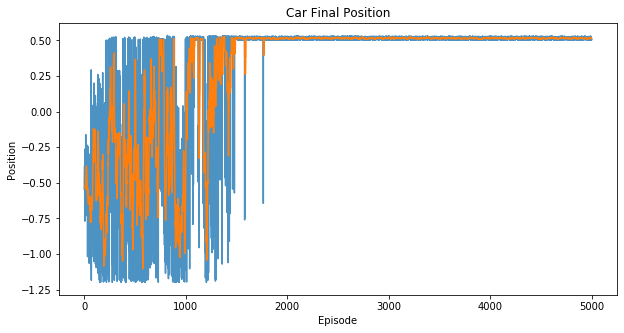

In [237]:
plt.figure(2, figsize=[10,5])
p = pd.Series(rewards_new)
ma = p.rolling(10).mean()
plt.plot(p, alpha=0.8)
plt.plot(ma)
plt.xlabel('Episode')
plt.ylabel('Position')
plt.title('Car Final Position')
plt.show()

##### Here after While using baseline parameters the car is reaching the target consistently after 700 episodes 

### Choosing alpha and gamma in the equation!!!
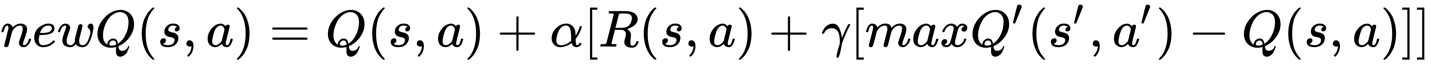




The learning rate, set between 0 and 1. Setting it to 0 means that the Q-values are never updated, hence nothing is learned. Setting a high value such as 0.9 means that learning can occur quickly.

The discount factor, also set between 0 and 1. This models the fact that future rewards are worth less than immediate rewards. Mathematically, the discount factor needs to be set less than 0 for the algorithm to converge

We will experiment with other values for alpha and gamma and observe how did it change the baseline performance?

In [143]:
rewards_new_ht = QLearning_new(env, 0.6, 0.7, 1.0, 0, 0.01,5000)

Episode 100 Average Reward: -100.5
Episode 200 Average Reward: -100.37230846269404
Episode 300 Average Reward: -98.00190731481004
Episode 400 Average Reward: -99.89849889179932
Episode 500 Average Reward: -95.01149240966431
Episode 600 Average Reward: -93.88407608695653
Episode 700 Average Reward: -95.12866527800033
Episode 800 Average Reward: -94.1176851651911
Episode 900 Average Reward: -92.78026905829596
Episode 1000 Average Reward: -85.9633784425451
Episode 1100 Average Reward: -88.67476538660833
Episode 1200 Average Reward: -91.2591147285093
Episode 1300 Average Reward: -92.52532688715526
Episode 1400 Average Reward: -91.19909350344133
Episode 1500 Average Reward: -92.35475875743556
Episode 1600 Average Reward: -79.97001605136437
Episode 1700 Average Reward: -79.13956185567011
Episode 1800 Average Reward: -77.14550819672131
Episode 1900 Average Reward: -79.46820440932841
Episode 2000 Average Reward: -77.40941698187035
Episode 2100 Average Reward: -75.83482800160621
Episode 2200 Av

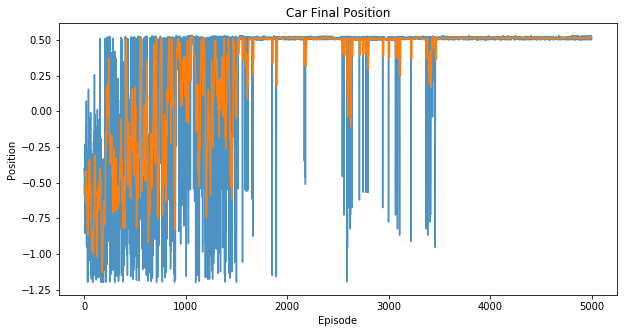

In [144]:
plt.figure(2, figsize=[10,5])
p = pd.Series(rewards_new_ht)
ma = p.rolling(10).mean()
plt.plot(p, alpha=0.8)
plt.plot(ma)
plt.xlabel('Episode')
plt.ylabel('Position')
plt.title('Car Final Position')
plt.show()

In [ ]:
Performance of the model has increased when changing learning rate to 0.9 and discount to 0.6

### Try a policy other than maxQ(s', a'). How did it change the baseline performance?

In [205]:
def QLearning_old_policy(env, learning, discount, epsilon, min_eps,episodes):
    # Converting observation space to integers multiplying with 10 and 100 for position and velocity respectively
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    
    # Initial Values for q table within range -1 to 1 randomly with q table of dim 19*15*3
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (num_states[0], num_states[1], 
                                  env.action_space.n))
    # List variables to store rewards list avg rewards and car positions
    reward_list = []
    ave_reward_list = []
    car_position = []
    
    # Calculating  episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    
    for i in range(episodes):
        done = False
        tot_reward, reward = 0,0
        #env is reseted for every new epsiode
        state = env.reset()

        #Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        
        while done != True:
            # render only last twenty episodes
            
#             if i >= (episodes - 20):
#                 env.render()

            # Determine next action - epsilon greedy strategy    
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
            
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
            else: # Adjust Q value for current state
                delta = learning*(reward + 
                                 discount*(np.max(Q[state2_adj[0], 
                                                   state2_adj[1]])+reward - 
                                 Q[state_adj[0], state_adj[1],action]))
                Q[state_adj[0], state_adj[1],action] += delta
            
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
            
            # Decay epsilon
            if epsilon > min_eps:
                epsilon -= reduction

            
              
            
        reward_list.append(tot_reward)
        
        car_position+=[state2[0]]
        
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        if (i+1) % 100 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
            
            
    env.close()
    
    return car_position
        
    

In [206]:
rewards_old_policy = QLearning_old_policy(env, 0.7, 0.8, 1.0, 0,5000)

Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -199.86
Episode 300 Average Reward: -199.91
Episode 400 Average Reward: -185.18
Episode 500 Average Reward: -198.08
Episode 600 Average Reward: -199.39
Episode 700 Average Reward: -183.02
Episode 800 Average Reward: -174.35
Episode 900 Average Reward: -171.72
Episode 1000 Average Reward: -163.8
Episode 1100 Average Reward: -161.64
Episode 1200 Average Reward: -177.1
Episode 1300 Average Reward: -180.93
Episode 1400 Average Reward: -176.57
Episode 1500 Average Reward: -199.53
Episode 1600 Average Reward: -191.63
Episode 1700 Average Reward: -174.69
Episode 1800 Average Reward: -168.4
Episode 1900 Average Reward: -169.1
Episode 2000 Average Reward: -168.06
Episode 2100 Average Reward: -167.01
Episode 2200 Average Reward: -168.99
Episode 2300 Average Reward: -169.78
Episode 2400 Average Reward: -169.14
Episode 2500 Average Reward: -168.38
Episode 2600 Average Reward: -167.51
Episode 2700 Average Reward: -170.3
Episode 2800 Ave

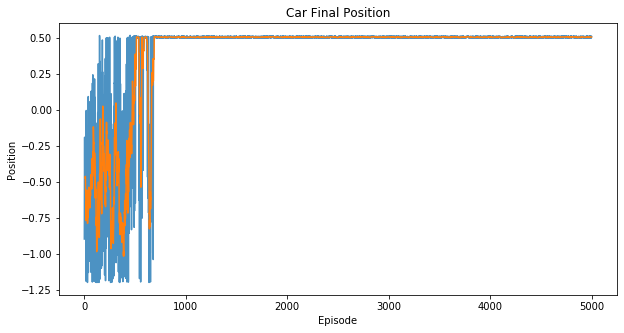

In [207]:
plt.figure(2, figsize=[10,5])
p = pd.Series(rewards_NR)
ma = p.rolling(10).mean()
plt.plot(p, alpha=0.8)
plt.plot(ma)
plt.xlabel('Episode')
plt.ylabel('Position')
plt.title('Car Final Position')
plt.show()

### How did you choose your decay rate and starting epsilon? Try at least one additional value for epsilon and the decay rate. How did it change the baseline performance? What is the value of epsilon when if you reach the max steps per episode?

In [208]:
def QLearning_new_dc(env, learning, discount, epsilon, min_eps, decay_rate,episodes):
    # Converting observation space to integers multiplying with 10 and 100 for position and velocity respectively
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    
    # Initial Values for q table within range -1 to 1 randomly with q table of dim 19*15*3
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (num_states[0], num_states[1], 
                                  env.action_space.n))
    # List variables to store rewards list avg rewards and car positions
    reward_list = []
    ave_reward_list = []
    car_position = []
    
    # Calculating  episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    
    for i in range(episodes):
        done = False
        tot_reward, reward = 0,0
        #env is reseted for every new epsiode
        state = env.reset()

        #Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        
        while done != True:
            # render only last twenty episodes
            
#             if i >= (episodes - 20):
#                 env.render()

            # Determine next action - epsilon greedy strategy    
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
            
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            else: # Adjust Q value for current state
                delta = learning*(reward + 
                                 discount*(np.max(Q[state2_adj[0], 
                                                   state2_adj[1]]) - 
                                 Q[state_adj[0], state_adj[1],action]))
                Q[state_adj[0], state_adj[1],action] += delta
            
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
            
            # Decay epsilon
#             if epsilon > min_eps:
#                 epsilon -= reduction

            #As Exploration should be more in the beginning once reaches target exploration should be minimum
            epsilon = min_eps + (epsilon - min_eps)*np.exp(-decay_rate*((episodes/2)-i))   
            
        reward_list.append(tot_reward)
        
        car_position+=[state2[0]]
        
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        if (i+1) % 100 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
            
            
    env.close()
    
    return car_position
        
    

In [214]:
rewards_new_dc = QLearning_new_dc(env, 0.7, 0.8, 0.9, 0, 0.07,5000)

Episode 100 Average Reward: -199.96
Episode 200 Average Reward: -199.48
Episode 300 Average Reward: -198.59
Episode 400 Average Reward: -199.04
Episode 500 Average Reward: -198.57
Episode 600 Average Reward: -195.04
Episode 700 Average Reward: -187.25
Episode 800 Average Reward: -174.57
Episode 900 Average Reward: -162.22
Episode 1000 Average Reward: -152.03
Episode 1100 Average Reward: -152.46
Episode 1200 Average Reward: -152.4
Episode 1300 Average Reward: -152.73
Episode 1400 Average Reward: -153.9
Episode 1500 Average Reward: -153.36
Episode 1600 Average Reward: -152.93
Episode 1700 Average Reward: -152.75
Episode 1800 Average Reward: -152.81
Episode 1900 Average Reward: -152.89
Episode 2000 Average Reward: -153.11
Episode 2100 Average Reward: -152.58
Episode 2200 Average Reward: -152.84
Episode 2300 Average Reward: -152.92
Episode 2400 Average Reward: -152.8
Episode 2500 Average Reward: -152.44
Episode 2600 Average Reward: -151.92
Episode 2700 Average Reward: -153.22
Episode 2800 

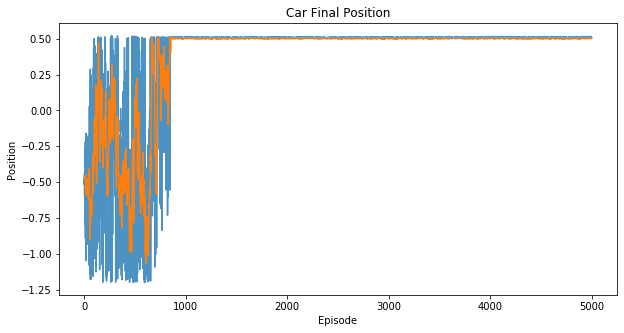

In [215]:
plt.figure(2, figsize=[10,5])
p = pd.Series(rewards_new_dc)
ma = p.rolling(10).mean()
plt.plot(p, alpha=0.8)
plt.plot(ma)
plt.xlabel('Episode')
plt.ylabel('Position')
plt.title('Car Final Position')
plt.show()

What is the average number of steps taken per episode?

### Does Q-learning use value-based or policy-based iteration?

### What is meant by expected lifetime value in the Bellman equation?

## Conclusion

In this article, we have demonstrated how RL can be used to solve the OpenAI Gym Mountain Car problem. To solve this problem, it was necessary to discretize our state space and make some small modifications to the Q-learning algorithm, but other than that, the technique used was the same as that used to solve the simple grid world problem in the first article in this series.
But this is just one of the many environments available to users in Open AI Gym. For readers interested in trying out the skills they have learned in this article on their own, I recommend experimenting with any of the other Classic Control problem (available here) and then moving on to the Box 2D problems.
By continually modifying and building on the Q-learning algorithm, it should be possible to solve any of the environments available to users of OpenAI Gym. Nevertheless, as with everything, the first step is learning the basics. This is what we have succeeded in doing today.

## License

Copyright 2020 Satya Ikyath Varma Dantuluri

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.